# **Regression Project: Boston House Price Prediction**

#### -------------------------------
## **Objective**
-------------------------------

The problem at hand is to **predict the housing prices of a town or a suburb based on the features of the locality provided to us**. In the process, we need to **identify the most important features affecting the price of the house**. We will employ techniques of data preprocessing and build a linear regression model that predicts the prices for the unseen data.

----------------------------
## **Dataset**
---------------------------

Each record in the database describes a house in Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The data was provided by MIT Applied Data Science Program.

Attribute Information:

- **CRIM:** Per capita crime rate by town
- **ZN:** Proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS:** Proportion of non-retail business acres per town
- **CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX:** Nitric Oxide concentration (parts per 10 million)
- **RM:** The average number of rooms per dwelling
- **AGE:** Proportion of owner-occupied units built before 1940
- **DIS:** Weighted distances to five Boston employment centers
- **RAD:** Index of accessibility to radial highways
- **TAX:** Full-value property-tax rate per 10,000 dollars
- **PTRATIO:** Pupil-teacher ratio by town
- **LSTAT:** % lower status of the population
- **MEDV:** Median value of owner-occupied homes in 1000 dollars

## **Importing the necessary libraries**

In [260]:
# Import libraries for data manipulation
import pandas as pd
import numpy as np
import datatable as dt

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot

# Import libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Import library for preparing data
from sklearn.model_selection import train_test_split

# Import library for data preprocessing
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler


import warnings
warnings.filterwarnings("ignore")

### Loading the dataset

In [261]:
boston = dt.fread("C:/Users/sylwi/OneDrive/Documents/GitHub/Boston_House_Price/Boston.csv").to_pandas()
boston.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,False,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,False,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,False,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,False,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,False,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [262]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    bool   
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int32  
 9   TAX      506 non-null    int32  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: bool(1), float64(10), int32(2)
memory usage: 44.1 KB


**Observations:**

- There are a total of **506 non-null observations in each of the columns**. This indicates that there are **no missing values** in the data.
- There are **13 columns** in the dataset and **every column is of numeric data type**. CHAS is a boolean value.

In [200]:
boston.duplicated().sum()

0

In [263]:
boston.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


**Observations:**

- There no duplicates in the data.
- Summary statistics look as expected. The TAX (property tax rate) has the largest variability, while NOX concentrations have the smallest.

## Exploratory Data Analysis (EDA)

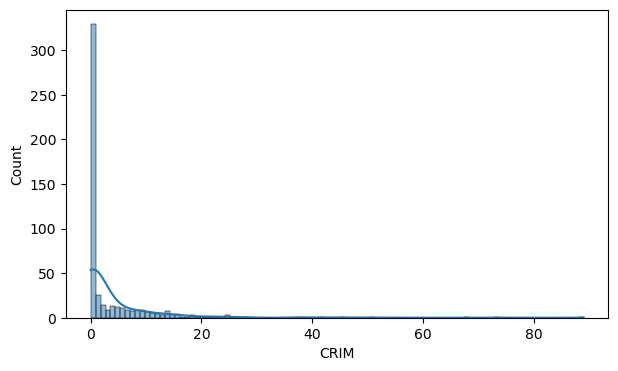

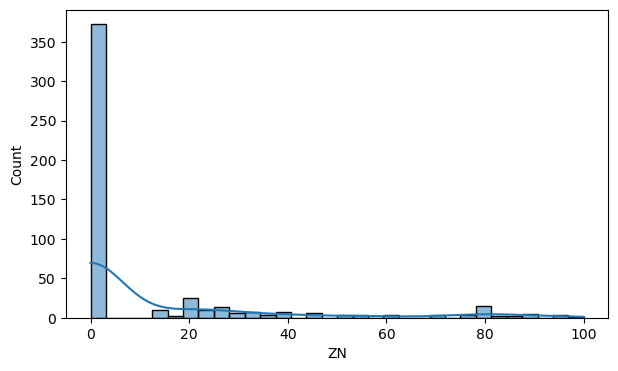

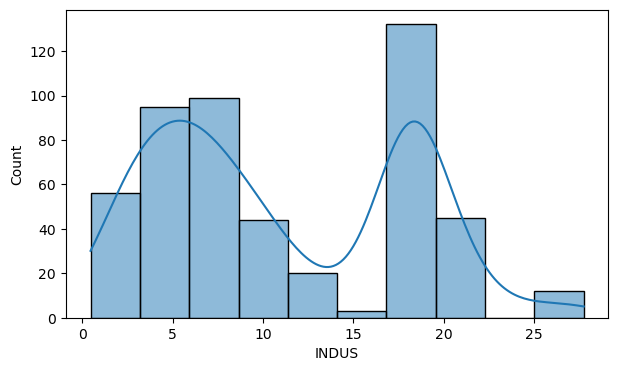

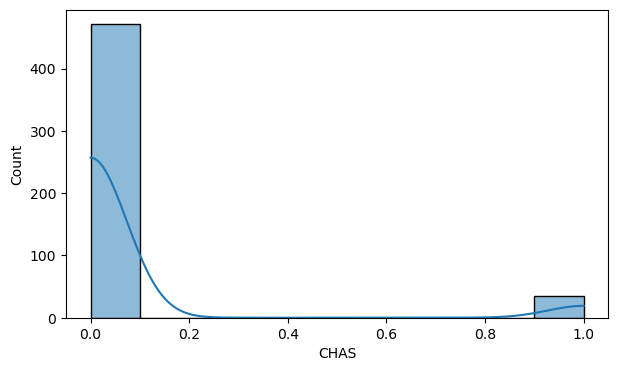

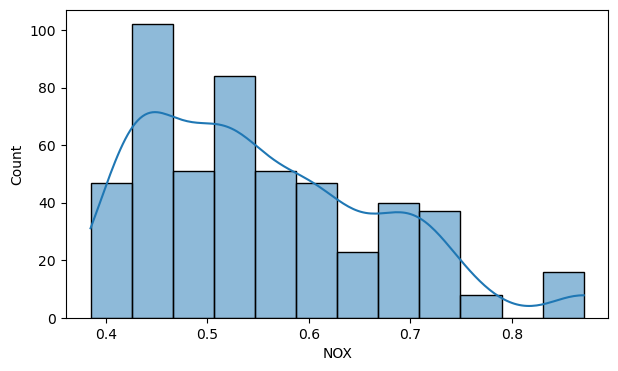

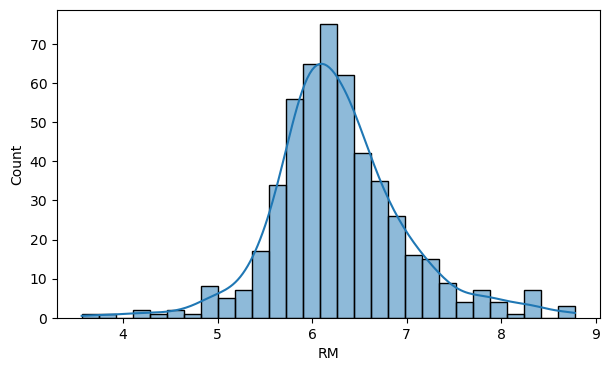

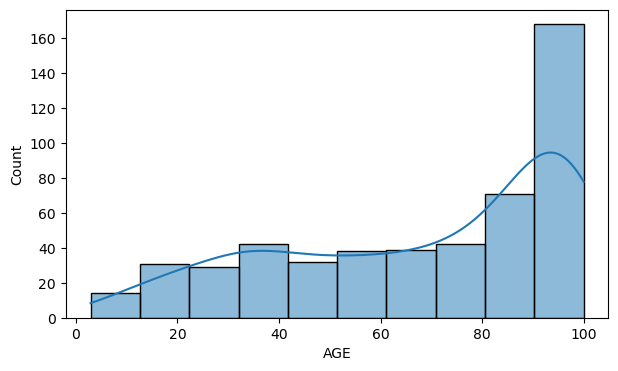

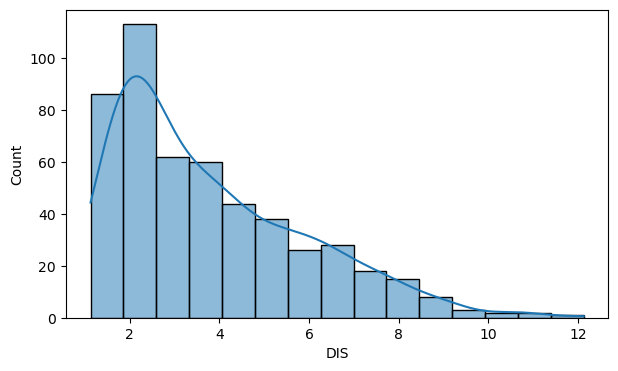

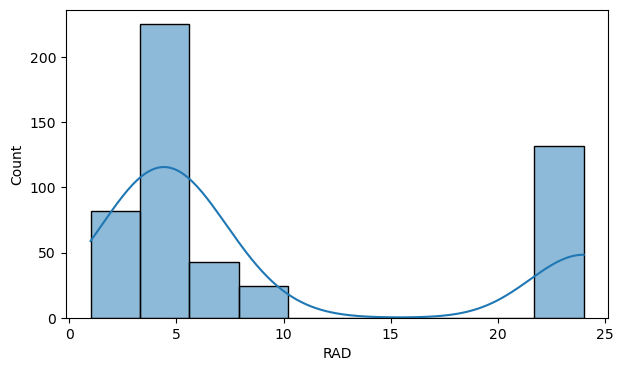

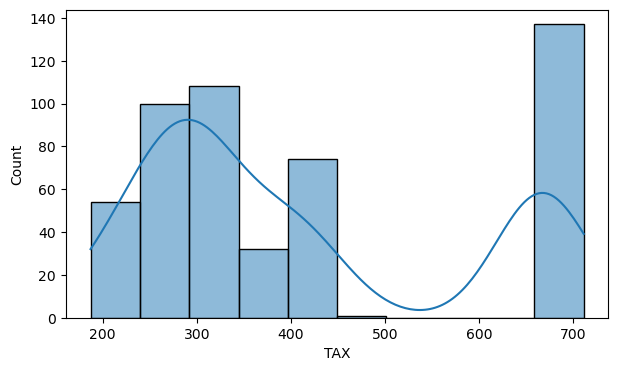

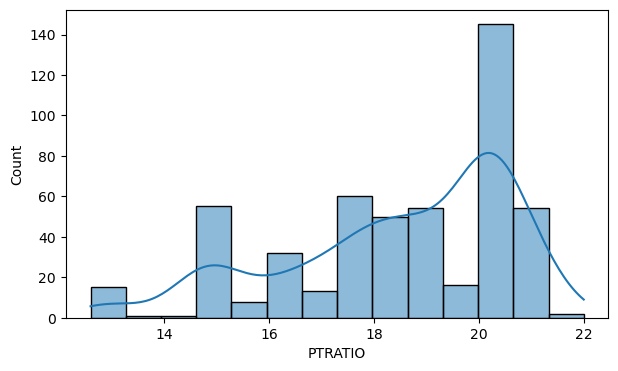

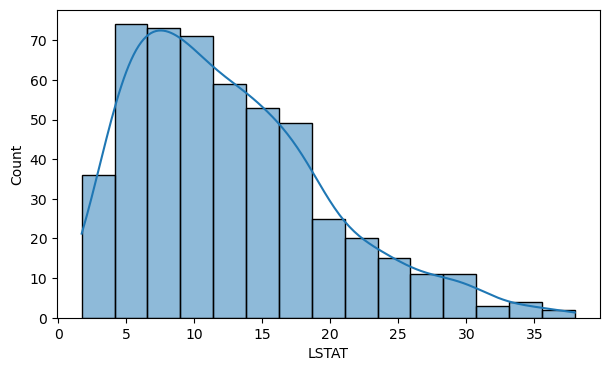

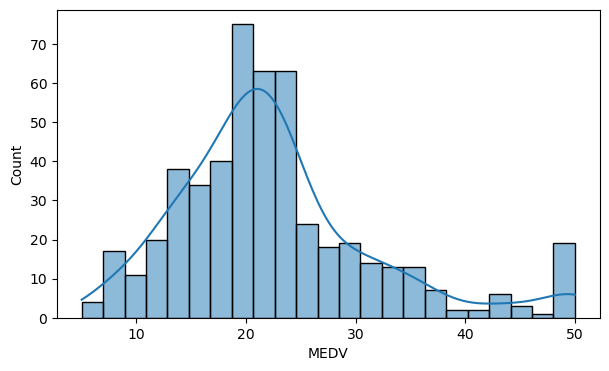

In [264]:
# Regression lets you predict the values of a response variable from known values of explanatory variables. We will use price as our response variable. It is dependent upon explanatory variables
# Let's visualize price against the various variables for any patterns through a correlation heatmap
# Plotting all the columns to look at their distributions
for i in boston.columns:
    
    plt.figure(figsize = (7, 4))
    sns.histplot(data = boston, x = i, kde = True)
    plt.show()

<Axes: >

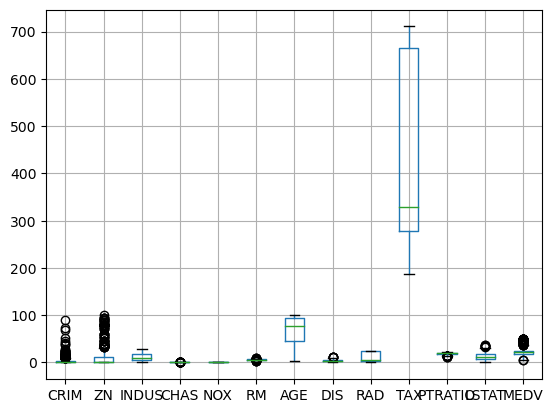

In [99]:
boston.boxplot()

**Observations:**

- The following variables are **right-skewed**: CRIM, ZN, CHAS, NOX, DIS, LSTAT. **MEDV, our response variable is slightly right-skewed as well.
- The following variables are **left-skewed**: AGE, PTRATIO
- **RM follows a normal distribution.**
- TAX, RAD, INDUS are **bimodal**.

## Data Preprocessing
- Missing value treatment
- Log transformation of dependent variable if skewed
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [265]:
# Log transformation of the responsible variable due to slight skew
boston['MEDV_log'] = np.log(boston['MEDV'])

<Axes: xlabel='MEDV_log', ylabel='Count'>

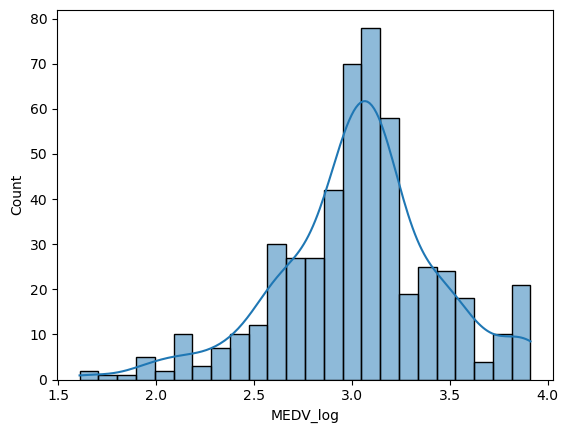

In [266]:
sns.histplot(data = boston, x = 'MEDV_log', kde = True)

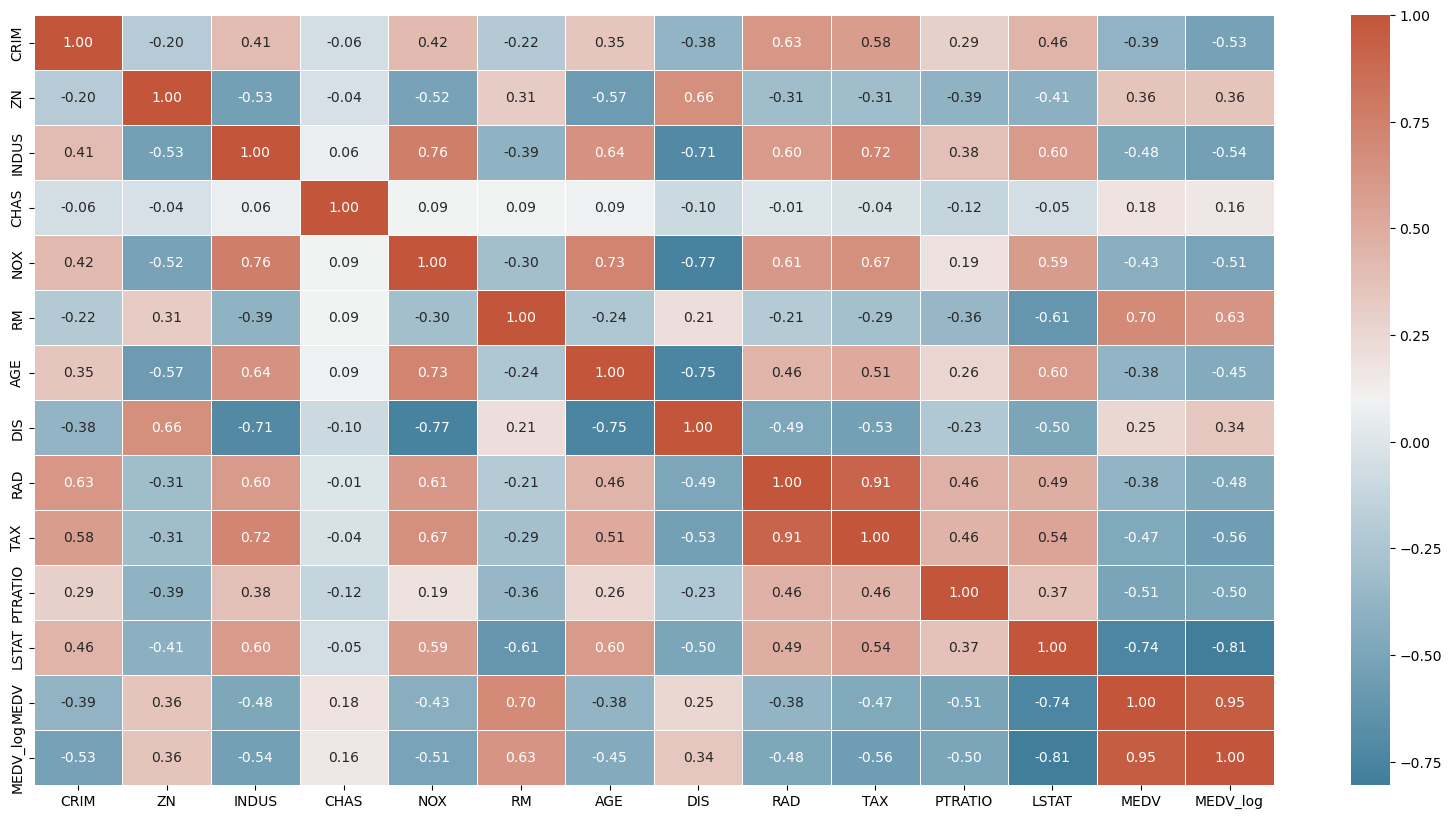

In [267]:
# Check bivariate relationships using heatmap
plt.figure(figsize = (20, 10))
cmap = sns.diverging_palette(230, 20, as_cmap = True)
sns.heatmap(boston.corr(), annot = True, fmt = '.2f', linewidths=0.5, cmap = cmap)
plt.show()

**Observations:**

The following variables exhibit **positive** correlation (>0.70):
*  TAX and RAD
*  MEDV and RM
*  INDUS and TAX
*  AGE and NOX
*  INDUS and NOX

It makes sense that house prices would be positively correlated to RM, or the average number of rooms per dwelling, as prices tend to increase as home square footage increases. Property tax rates are also positively correlatd with RAD, or the index of accessibility to radial highways, and INDUS, or the proportion of non-retail business acres per town. We can ignore any correlations that include NOX, as it's unlikely that nitric oxide concentrations influenced home prices.

The following variables exhibit **negative** correlation (< -0.70):
*  MEDV and LSTAT
*  AGE and DIS
*  INDUS and DIS
*  DIS and NOX

It makes sense that house prices would be negatively correlated with LSTAT, or the % lower status of the population. Home prices are typically higher in affluent neighborhoods with a higher economic status. The AGE, or proportion of owner-occupied units built before 1940, is negatively correlated with DIS, or the weighted distances to five Boston employment centers. Additionally, the proportion of non-retail business acres are negatively correlated to the weighted distances to employement centers, which makes sense as city centers have a lot of non-retail business buildings.

### **Visualizing the relationship between the features having significant correlations (>= 0.7 or <= -0.7) using scatterplots**

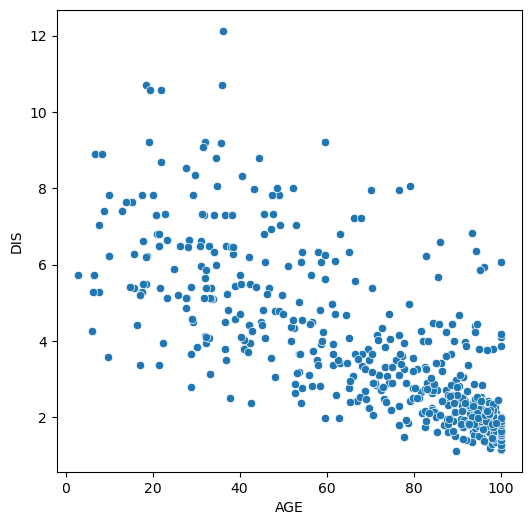

In [268]:
# Scatterplot to visualize the relationship between AGE and DIS
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'AGE', y = 'DIS', data = boston)

plt.show()

**Observations:**
- The distance of the houses to the Boston employment centers appears to decrease moderately as the the proportion of the old houses increase in the town. Boston was founded in the early 1600s so it is possible that employment centers there were constructed where proportion of owner-occupied units built prior to 1940 is comparatively high.

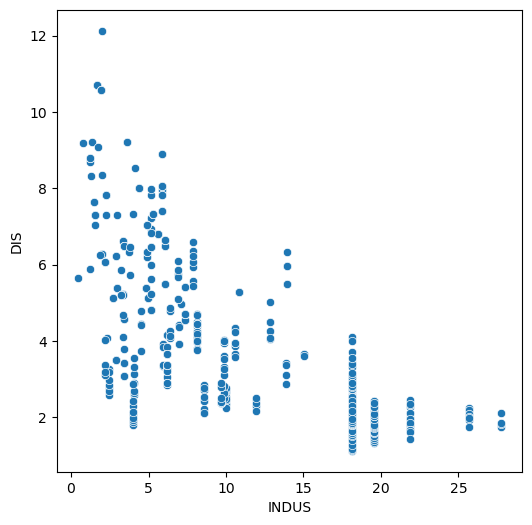

In [19]:
# Scatterplot to visualize the relationship between INDUS and DIS
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'INDUS', y = 'DIS', data = boston)

plt.show()

**Observations:**
- The proportion of non-retail business acres is slightly negatively correlated to the weighted distances to Boston employement centers. As we get closer to employment centers, it's not surprising that there is more non-retail business acreage. 

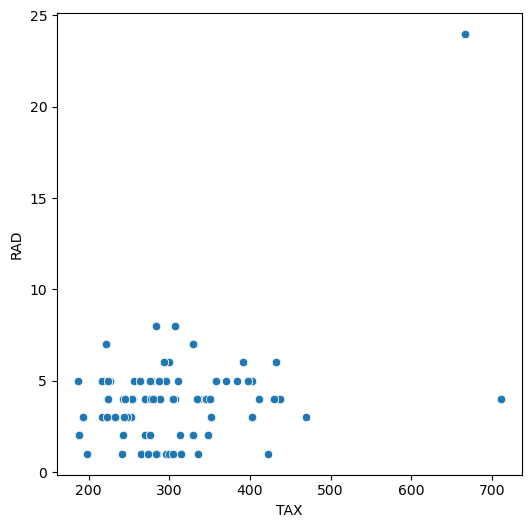

In [14]:
# Scatterplot to visualize the relationship between TAX and RAD
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'TAX', y = 'RAD', data = boston)

plt.show()

**Observations:**
- The positive correlation between TAX and RAD is very high (0.91) but there is no observed trend between the variables on this scatterplot. This may be due to outliers in the data.

In [269]:
# Remove the data corresponding to high tax rate outliers above 600
boston1 = boston[boston['TAX'] < 600]

# Import the required function
from scipy.stats import pearsonr

# Calculate the correlation
print('The correlation between TAX and RAD is', pearsonr(boston1['TAX'], boston1['RAD'])[0])

The correlation between TAX and RAD is 0.24975731331429196


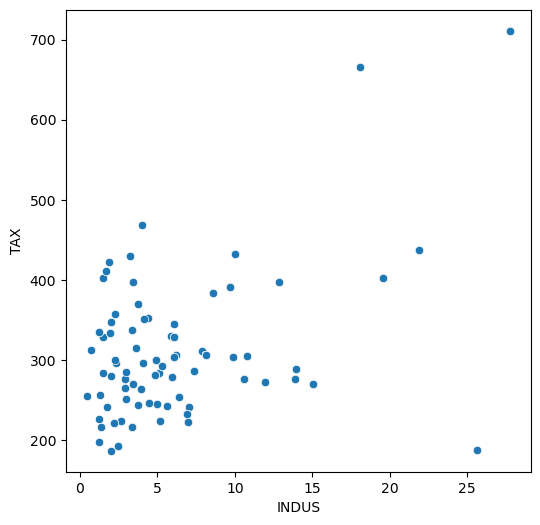

In [208]:
# Scatterplot to visualize the relationship between INDUS and TAX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'INDUS', y = 'TAX', data = boston)

plt.show()

**Observations:**

- The tax rate appears to increase with an increase in the proportion of non-retail business acres per town. 

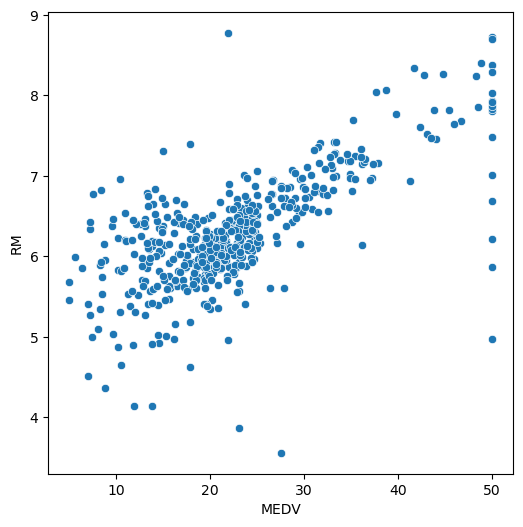

In [177]:
# Scatterplot to visualize the relationship between MEDV and RM
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'MEDV', y = 'RM', data = boston)

plt.show()

**Observations:**

- The price of the house seems to increase as the value of RM increases. This is expected as the price is generally higher for more rooms.
- There are a few outliers in a horizontal line as the MEDV value seems to be capped at 50.

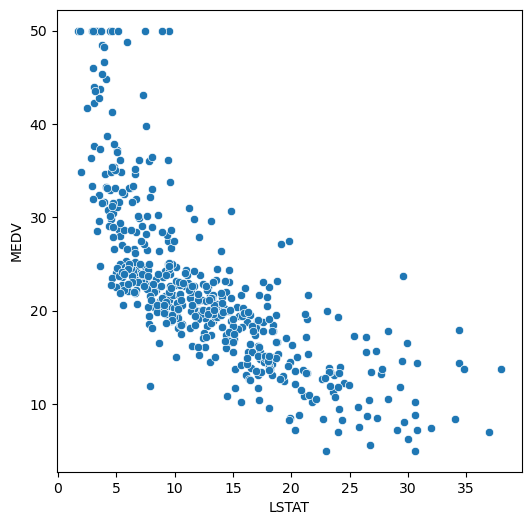

In [209]:
# Scatterplot to visualize the relationship between MEDV and LSTAT
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'LSTAT', y = 'MEDV', data = boston)

plt.show()

**Observations:**

- The prices of houses tends to decrease with an increase in LSTAT, or % of lower status of population. This is possible as the house price is lower in areas with people of lower socioeconomic status. 
- There are few outliers and the data seems to be capped at 50.

**The variables LSTAT and RM have a linear relationship with the responsble variable MEDV. There are significant relationships among a few independent variables, which is not desirable for a linear regression model. Let's first split the dataset.**

## Model Building - Linear Regression

### **Split the dataset**

Let's split the data into the dependent and independent variables and further split it into train and test set in a ratio of 70:30 for train and test sets.

In [277]:
# Create X from the independent variables
X = boston.drop(['MEDV', 'MEDV_log'], axis=1)

# Create y from the dependent variables
y = boston['MEDV_log']

# y = intercept + slope * x, the intercept of a straight line is the y value when x is zero
# Adding a constant term (column of 1s) for the Intercept (so that residuals have a mean of zero)
X = sm.add_constant(X)

# Check the shape of the features and targets
print(X.shape, y.shape)

(506, 13) (506,)


In [278]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

### Testing for multicollinearity
The Variance Infalation Factor (VIF) can be used to describe how inflated the variance of the coefficient is compared to what it would be if the variables were not correlated with any other variable in the model. 

In [273]:
# Converting all variables to floats before the multicollinearity check
boston = boston.astype(float)
boston.dtypes

CRIM        float64
ZN          float64
INDUS       float64
CHAS        float64
NOX         float64
RM          float64
AGE         float64
DIS         float64
RAD         float64
TAX         float64
PTRATIO     float64
LSTAT       float64
MEDV        float64
MEDV_log    float64
dtype: object

In [279]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train))

    feature         VIF
0     const  535.372593
1      CRIM    1.924114
2        ZN    2.743574
3     INDUS    3.999538
4      CHAS    1.076564
5       NOX    4.396157
6        RM    1.860950
7       AGE    3.150170
8       DIS    4.355469
9       RAD    8.345247
10      TAX   10.191941
11  PTRATIO    1.943409
12    LSTAT    2.861881


**Observations:**

- There are two variables with a high VIF - RAD and TAX (greater than 5). 
- Let's remove TAX as it has the highest VIF values and check the multicollinearity again.

In [280]:
# Update the X_train variable after dropping TAX
X_train = X_train.drop(["TAX"], axis=1)

# Check for VIF
print(checking_vif(X_train))

    feature         VIF
0     const  532.025529
1      CRIM    1.923159
2        ZN    2.483399
3     INDUS    3.270983
4      CHAS    1.050708
5       NOX    4.361847
6        RM    1.857918
7       AGE    3.149005
8       DIS    4.333734
9       RAD    2.942862
10  PTRATIO    1.909750
11    LSTAT    2.860251


Now, we will create the linear regression model as the VIF is less than 5 for all the independent variables, and we can assume that multicollinearity has been removed between the variables.

In [281]:
# Create the model and get the model summary
linreg_model = sm.OLS(y_train, X_train).fit()
linreg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MEDV_log   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     103.3
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          1.40e-101
Time:                        19:19:41   Log-Likelihood:                 76.596
No. Observations:                 354   AIC:                            -129.2
Df Residuals:                     342   BIC:                            -82.76
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6324      0.243     19.057      0.000       4.154       5.111
CRIM          -0.0128      0.002     -7.445      0.000      -0.016      -0.009
ZN             0.0010      0.001      1.425      0.155      -0.000       0.002
INDUS         -0.0004      0.003     -0.148      0.883      -0.006       0.005
CHAS           0.1196      0.039      3.082      0.002       0.043       0.196
NOX           -1.0598      0.187     -5.675      0.000      -1.427      -0.692
RM             0.0532      0.021      2.560      0.011       0.012       0.094
AGE            0.0003      0.001      0.461      0.645      -0.001       0.002
DIS           -0.0503      0.010     -4.894      0.000      -0.071      -0.030
RAD            0.0076      0.002      3.699      0.000       0.004       0.012
PTRATIO       -0.0452      0.007     -6.659      0.000      -0.059      -0.032
LSTAT         -0.0298      0.002    -12.134      0.000      -0.035      -0.025
==============================================================================
Omnibus:                       30.699   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.718
Skew:                           0.372   Prob(JB):                     6.62e-19
Kurtosis:                       5.263   Cond. No.                     2.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Observations:

* R-squared for the model is 0.769 and indicates that **~77% of the response variable can be perfectly explained without error by the predictor variables.**
* **The regression coefficient for the intercept is 4.63.** This means if all other variables are 0, the average expected house price is 4,630 dollars.
* **From the above it may be noted that the regression coefficients corresponding to ZN, AGE and INDUS are not statistically significant at level α = 0.05. Hence, to avoid overfitting we will eliminate the three features and create a new model.**

In [293]:
X = boston.drop(["ZN", "AGE", "INDUS", "TAX", "MEDV", "MEDV_log"], axis=1)

y = boston["MEDV_log"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

X_train = sm.add_constant(X_train)

linreg_model2 = sm.OLS(y_train, X_train).fit()

linreg_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MEDV_log   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     142.1
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          2.61e-104
Time:                        19:25:46   Log-Likelihood:                 75.486
No. Observations:                 354   AIC:                            -133.0
Df Residuals:                     345   BIC:                            -98.15
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6494      0.242     19.242      0.000       4.174       5.125
CRIM          -0.0125      0.002     -7.349      0.000      -0.016      -0.009
CHAS           0.1198      0.039      3.093      0.002       0.044       0.196
NOX           -1.0562      0.168     -6.296      0.000      -1.386      -0.726
RM             0.0589      0.020      2.928      0.004       0.019       0.098
DIS           -0.0441      0.008     -5.561      0.000      -0.060      -0.028
RAD            0.0078      0.002      3.890      0.000       0.004       0.012
PTRATIO       -0.0485      0.006     -7.832      0.000      -0.061      -0.036
LSTAT         -0.0293      0.002    -12.949      0.000      -0.034      -0.025
==============================================================================
Omnibus:                       32.514   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.354
Skew:                           0.408   Prob(JB):                     1.07e-19
Kurtosis:                       5.293   Cond. No.                         690.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observations:

* R-squared for the model is now slightly less, 0.767, meaning that **~76.7% of the response variable can be accurately predicted by the predictor variables. The ddjusted R-squared value, which is a better suited metric for model comparison has actually increased by 0.001 to 76.2%.**
* All variables are statistically significant (p < 0.05)

## Checking Linear Regression Assumptions
In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied:
1. Mean of residuals should be 0
2. No Heteroscedasticity
3. Linearity of variables
4. Normality of error terms

In [294]:
# Check whether the mean of residuals is 0 or close to 0
# .resid indicates inaccuracy of model fit
residuals = linreg_model2.resid 
residuals.mean()

-2.5553946905779028e-15

In [295]:
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

# Use Goldfeldquandt Test to test the following hypothesis (Null Hypothesis: Residuals are homoscedastic; Alternative hypothesis: Residuals are heteroscedastic) with alpha = 0.05:

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(y_train,X_train)
lzip(name, test)

[('F statistic', 1.0835082923425294), ('p-value', 0.30190120067668674)]

Observations:

* The p-value is greater than 0.05, so we fail to reject the null-hypothesis which is that the residuals are homoscedastic. That means residuals are homoscedastic and thus symmetrically distributed across the regression line.

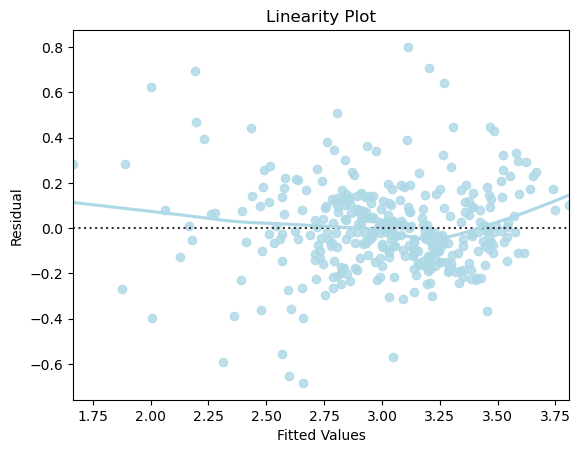

In [296]:
# Let's check for the linearity of variables
# The .fittedvalues attribute gives you the model's predictions on the original dataset
fitted = linreg_model2.fittedvalues

# Plot residuals and fitted values on a plot to test whether they are randomly and uniformly scattered on the x-axis
sns.residplot(x = fitted, y = residuals, color="lightblue", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Linearity Plot")
plt.show()

Observations:

* There is no pattern so the values are randomly distributted

<Axes: ylabel='Count'>

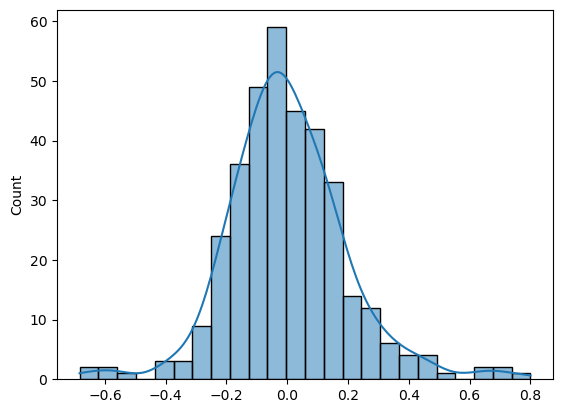

In [297]:
# Plot histogram of residuals to check for normality of errors
sns.histplot(residuals, kde=True)

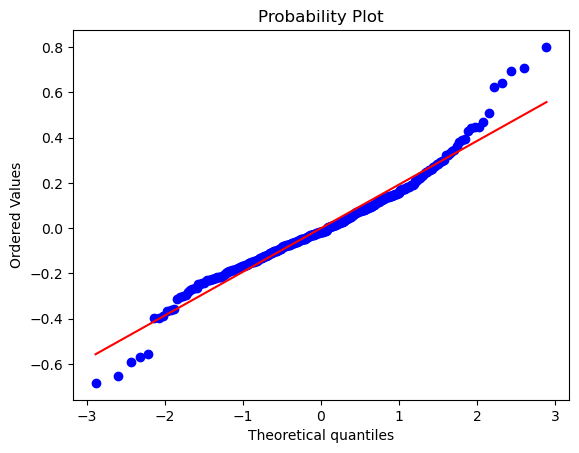

In [298]:
# Plot q-q plot of residuals
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
plt.show()

Observations:

* Residuals are normally distributed so the last assumption is satisfied and the model fits well.

## Model Performance Check on Train and Test Data

In [302]:
X_test = sm.add_constant(X_test)
print(X_train.shape, X_test.shape)

(354, 9) (152, 9)


In [303]:
# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model Performance on test and train data
def model_pref(olsmodel, X_train, X_test):

    # In-sample Prediction
    y_pred_train = olsmodel.predict(X_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(X_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test),
                ],
                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test),
                ],
                "MAPE": [
                    mape(y_pred_train, y_observed_train),
                    mape(y_pred_test, y_observed_test),
                ],
            }
        )
    )


# Checking model performance
model_pref(linreg_model2, X_train, X_test)  

    Data      RMSE       MAE      MAPE
0  Train  0.195504  0.143686  4.981813
1   Test  0.198045  0.151284  5.257965


Observations:

* The model is just as good at predicting on the test data as it is on the train data
* MAPE and MAE error are slightly higher and can improve

### **Apply cross validation to improve the model and evaluate it using different evaluation metrics**

In [304]:
# Import the required function
from sklearn.model_selection import cross_val_score

# Build the regression model and cross-validate
linreg = LinearRegression()                                    

cv_Score11 = cross_val_score(linreg, X_train, y_train, cv = 10)
cv_Score12 = cross_val_score(linreg, X_train, y_train, cv = 10, 
                             scoring = 'neg_mean_squared_error')                                  


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.729 (+/- 0.232)
Mean Squared Error: 0.041 (+/- 0.023)


Observations:

* The R-squared on the cross validation is 0.729, whereas on the training dataset it was 0.767
*  MSE on cross validation is 0.041
* We may want to rebuild with new features or add feature engineering to increase the R-squared and decrease the MSE on cross validation

### Get model coefficients in a pandas DataFrame with column 'Feature' having all the features and column 'Coefs' with all the corresponding Coefs.

In [305]:
coef = linreg_model2.params

pd.DataFrame({'Feature' : coef.index, 'Coefs' : coef.values})

,Feature,Coefs
0,const,4.649386
1,CRIM,-0.012500
2,CHAS,0.119773
3,NOX,-1.056225
4,RM,0.058907
5,DIS,-0.044069
6,RAD,0.007848
7,PTRATIO,-0.048504
8,LSTAT,-0.029277
